## Avacado Project

### Problem Statement:

#### Avocado is a fruit consumed by people heavily in the United States.

### Content

#### This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

#### The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

#### Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

#### The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.



#### Some relevant columns in the dataset:

#### Date - The date of the observation
#### AveragePrice - the average price of a single avocado
#### type - conventional or organic
#### year - the year
#### Region - the city or region of the observation
#### Total Volume - Total number of avocados sold
#### 4046 - Total number of avocados with PLU 4046 sold
#### 4225 - Total number of avocados with PLU 4225 sold
#### 4770 - Total number of avocados with PLU 4770 sold


### Importing Libraries

In [4]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler() 
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [5]:
#reading the datset...
df_ = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv" )
df=df_.drop(["Unnamed: 0"],axis=1)
df=df.dropna()
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [6]:
# Finding out the column informations and data types we need 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 165.9+ KB


In [7]:
#finding out the descriptiove statistics
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [88]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
dtype: int64

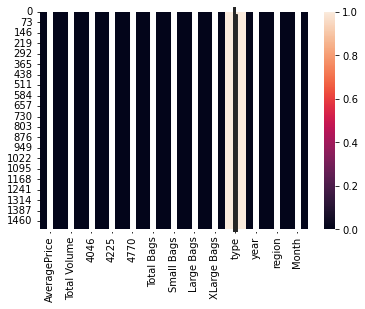

In [51]:
#lets check whether the null values are present in the dataset or not using heatmap
sns.heatmap(df.isnull(),annot=True)
plt.show()

AveragePrice       AxesSubplot(0.125,0.536818;0.110714x0.343182)
Total Volume    AxesSubplot(0.257857,0.536818;0.110714x0.343182)
4046            AxesSubplot(0.390714,0.536818;0.110714x0.343182)
4225            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
4770            AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Total Bags      AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Small Bags            AxesSubplot(0.125,0.125;0.110714x0.343182)
Large Bags         AxesSubplot(0.257857,0.125;0.110714x0.343182)
XLarge Bags        AxesSubplot(0.390714,0.125;0.110714x0.343182)
type               AxesSubplot(0.523571,0.125;0.110714x0.343182)
year               AxesSubplot(0.656429,0.125;0.110714x0.343182)
dtype: object

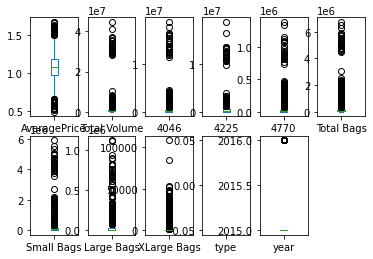

In [52]:
# checking by making boxplot....
df.plot(kind='box',subplots=True,layout=(2,6))

### Using Scatter plots to understand relationships between various features

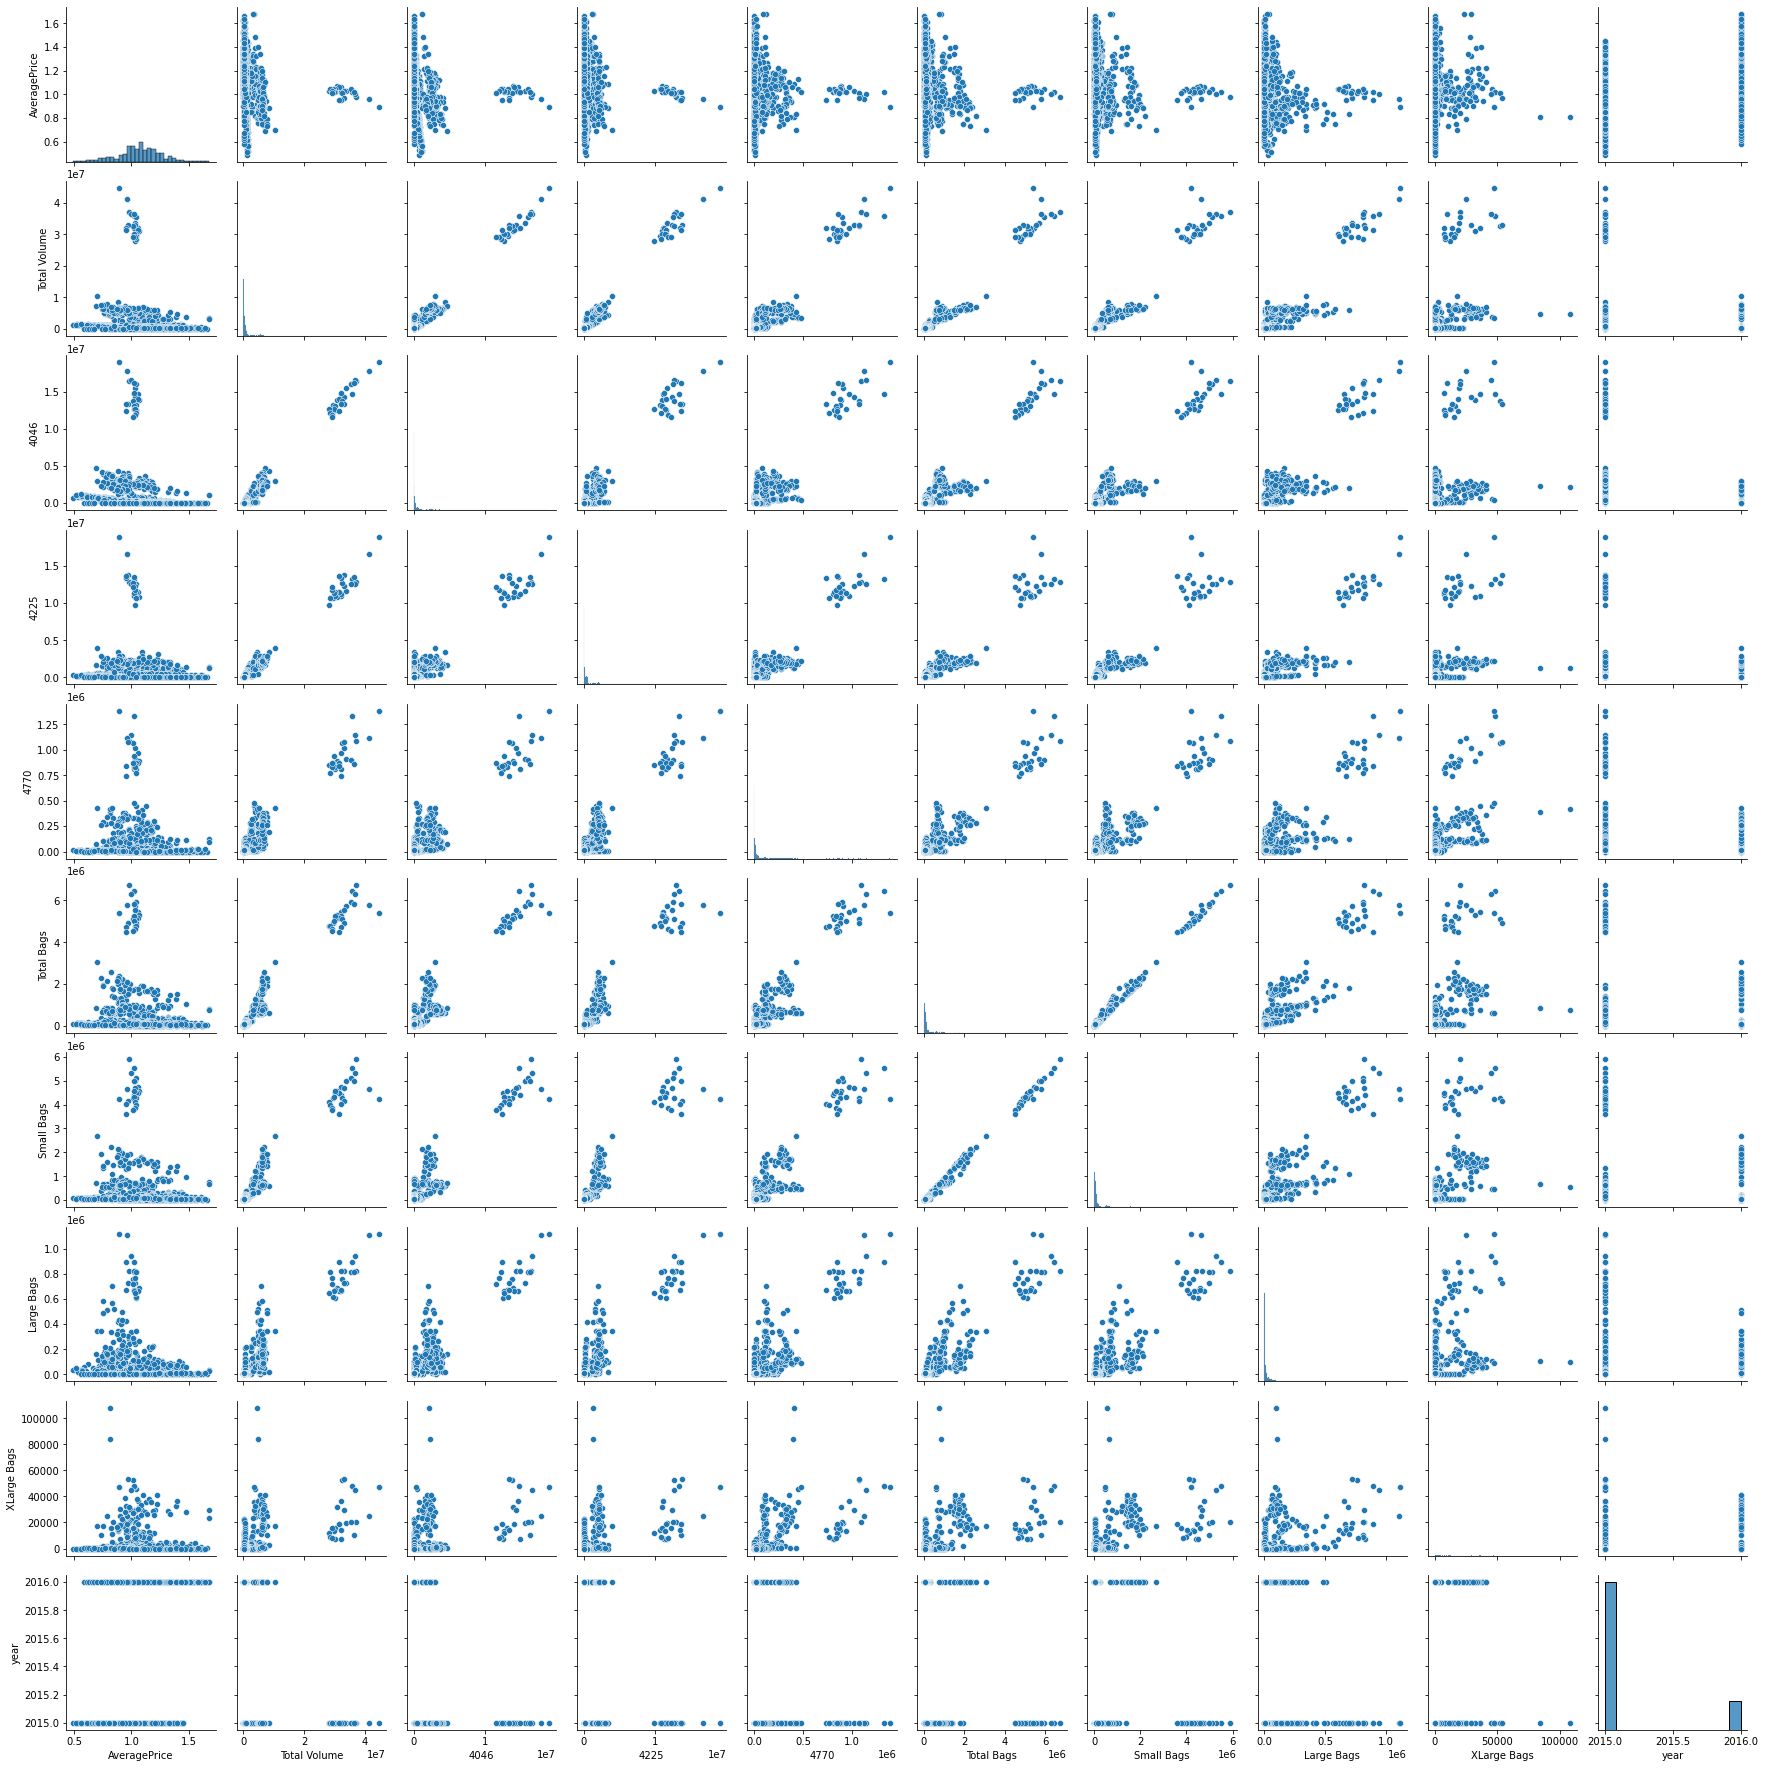

In [8]:

sns.pairplot(df,diag_kind="hist")

## Correlation matrix

In [90]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.326692,-0.511040,-0.129466,-0.289056,-0.190092,-0.149251,-0.214802,-0.064988,NaN,0.178683,-0.229408
Total Volume,-0.326692,1.000000,0.767171,0.890715,0.639882,0.938095,0.924203,0.587667,0.429998,NaN,0.003417,0.198022
4046,-0.511040,0.767171,1.000000,0.456283,0.584634,0.655837,0.620573,0.522558,0.322105,NaN,-0.124610,0.324688
4225,-0.129466,0.890715,0.456283,1.000000,0.552522,0.843787,0.851278,0.453820,0.382615,NaN,0.005161,0.134603
4770,-0.289056,0.639882,0.584634,0.552522,1.000000,0.584306,0.597229,0.361404,0.563302,NaN,0.004865,0.052908
Total Bags,-0.190092,0.938095,0.655837,0.843787,0.584306,1.000000,0.985506,0.594606,0.490465,NaN,0.138461,0.158998
Small Bags,-0.149251,0.924203,0.620573,0.851278,0.597229,0.985506,1.000000,0.499521,0.480714,NaN,0.168024,0.143571
Large Bags,-0.214802,0.587667,0.522558,0.453820,0.361404,0.594606,0.499521,1.000000,0.283456,NaN,-0.112991,0.084499
XLarge Bags,-0.064988,0.429998,0.322105,0.382615,0.563302,0.490465,0.480714,0.283456,1.000000,NaN,0.180988,-0.154524
type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

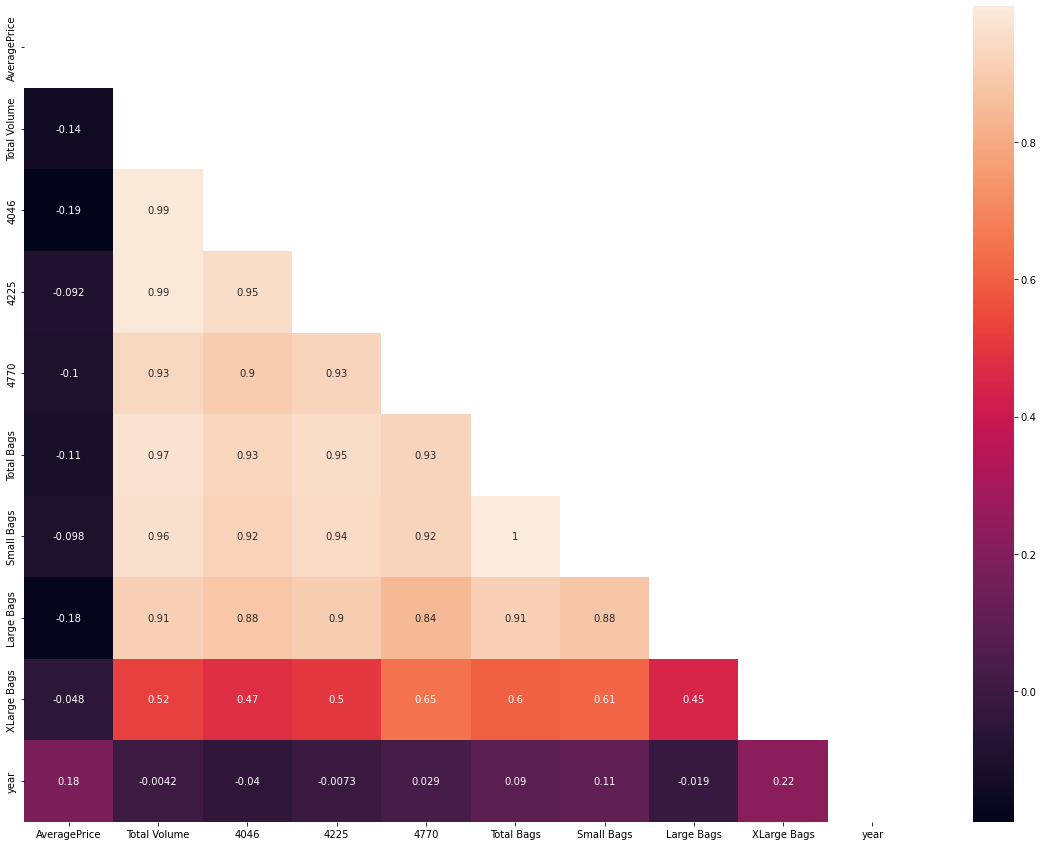

In [9]:

plt.figure(figsize=(20,15))
#ax=subplot(111)
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix)

### Understanding the density distribution is gaussian or not

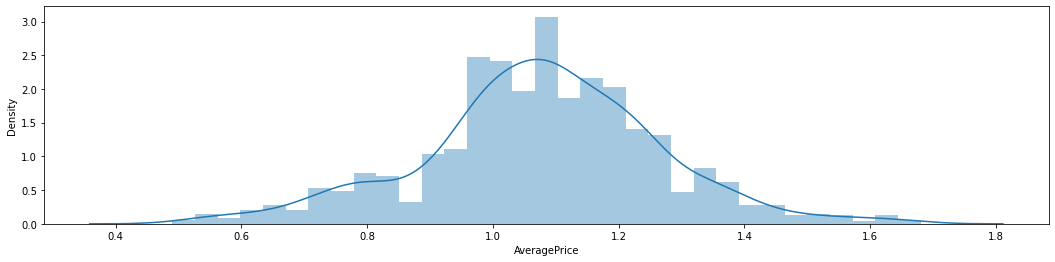

In [10]:

conventional = df[df['type'] == 'conventional']
organic = df[df['type'] == 'organic']
# df_organic.shape
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 4))
sns.distplot(conventional['AveragePrice']) # histogram
sns.distplot(organic['AveragePrice']) # histogram
plt.show()

<AxesSubplot:>

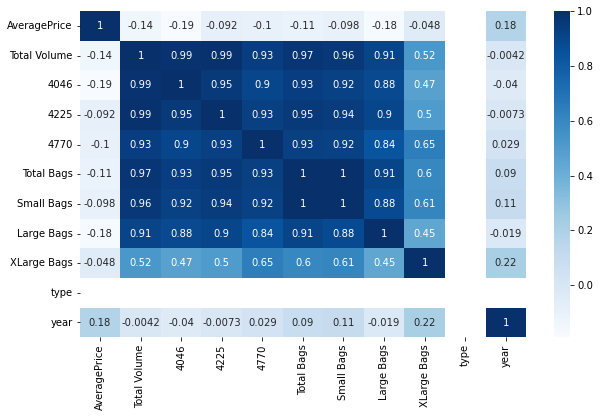

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

### #Lets check the skewness of the dataset

In [56]:

df.skew()
#there is some skewness which needs to be treated ,by seeing we can say obly +ve skewness is signifiacnt and needs tto be trated 

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
type                 NaN
year            1.828332
dtype: float64

### Treating using log

In [57]:

skew=('Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags' )
for col in skew:
    if df.skew().loc[col]>0.55:
         df[col]=np.log1p( df[col])
            

### #Lets again check the skewness

In [58]:

df.skew()

AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
type                 NaN
year            1.828332
dtype: float64

In [91]:
#Treating using log
skew=('Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags' )
for col in skew:
    if df.skew().loc[col]>0.55:
         df[col]=np.log1p( df[col])

In [92]:
#Lets again check the skewness
df.skew()

AveragePrice   -0.109444
Total Volume    0.442500
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.368284
Small Bags      0.409053
Large Bags     -0.912766
XLarge Bags     0.348073
type            0.000000
year            1.828332
region          0.288146
dtype: float64

In [93]:
from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy="most_frequent")

df['type']=imp.fit_transform(df['type'].values.reshape(-1,1))
df['region']=imp.fit_transform(df['region'].values.reshape(-1,1))

df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,2.490752,6.944801,10.905146,3.895080,2.309643,2.308573,4.545951,0.000000,0,2015.0,0,DEC
1,1.35,2.477619,6.515127,10.706381,4.083115,2.318433,2.317417,4.589955,0.000000,0,2015.0,0,DEC
2,0.93,2.540051,6.679222,11.600485,4.879007,2.303117,2.301843,4.645736,0.000000,0,2015.0,0,DEC
3,1.08,2.507737,7.032624,11.184108,4.298373,2.268791,2.266380,4.903495,0.000000,0,2015.0,0,JUNE
4,1.28,2.471515,6.848515,10.688288,4.340944,2.275201,2.271857,5.291746,0.000000,0,2015.0,0,NOV
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,2.577123,10.960064,10.939651,9.771828,2.484271,2.467759,9.245288,1.869640,0,2016.0,7,OCT
1513,1.51,2.571915,10.676528,10.862658,9.874088,2.489535,2.477354,9.059234,0.000000,0,2016.0,7,SEPT
1514,1.48,2.571990,10.744316,10.876052,9.725432,2.488366,2.475220,9.019078,2.043373,0,2016.0,7,FEB
1515,1.47,2.576437,10.898807,10.889203,9.769752,2.490357,2.478798,9.021509,0.000000,0,2016.0,7,SEPT


###  Importing label encoder 

In [94]:

from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 
 
df['type']= label_encoder.fit_transform(df['type'])        
df['region']= label_encoder.fit_transform(df['region'])

df['type'].unique() 
df['region'].unique() 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [95]:
x=df.iloc[:,:]
x.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,2.490752,6.944801,10.905146,3.895080,2.309643,2.308573,4.545951,0.0,0,2015.0,0,DEC
1,1.35,2.477619,6.515127,10.706381,4.083115,2.318433,2.317417,4.589955,0.0,0,2015.0,0,DEC
2,0.93,2.540051,6.679222,11.600485,4.879007,2.303117,2.301843,4.645736,0.0,0,2015.0,0,DEC
3,1.08,2.507737,7.032624,11.184108,4.298373,2.268791,2.266380,4.903495,0.0,0,2015.0,0,JUNE
4,1.28,2.471515,6.848515,10.688288,4.340944,2.275201,2.271857,5.291746,0.0,0,2015.0,0,NOV


In [97]:
# dropping columns that we dont want....
df.drop('Month',axis=1, inplace = True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,2.490752,6.944801,10.905146,3.895080,2.309643,2.308573,4.545951,0.000000,0,2015.0,0
1,1.35,2.477619,6.515127,10.706381,4.083115,2.318433,2.317417,4.589955,0.000000,0,2015.0,0
2,0.93,2.540051,6.679222,11.600485,4.879007,2.303117,2.301843,4.645736,0.000000,0,2015.0,0
3,1.08,2.507737,7.032624,11.184108,4.298373,2.268791,2.266380,4.903495,0.000000,0,2015.0,0
4,1.28,2.471515,6.848515,10.688288,4.340944,2.275201,2.271857,5.291746,0.000000,0,2015.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,2.577123,10.960064,10.939651,9.771828,2.484271,2.467759,9.245288,1.869640,0,2016.0,7
1513,1.51,2.571915,10.676528,10.862658,9.874088,2.489535,2.477354,9.059234,0.000000,0,2016.0,7
1514,1.48,2.571990,10.744316,10.876052,9.725432,2.488366,2.475220,9.019078,2.043373,0,2016.0,7
1515,1.47,2.576437,10.898807,10.889203,9.769752,2.490357,2.478798,9.021509,0.000000,0,2016.0,7


In [98]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [100]:
y=df[["AveragePrice","region"]]
y.head()

,AveragePrice,region
0,1.33,0
1,1.35,0
2,0.93,0
3,1.08,0
4,1.28,0


### Training the model using train test and split method

In [101]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=9)

In [102]:
x_train.shape

(1061, 12)

In [103]:
y_train.shape

(1061, 2)

In [104]:
x_test.shape

(456, 12)

In [105]:
y_test.shape

(456, 2)

### Finding the best model

In [107]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [108]:
KNN=KNeighborsClassifier(n_neighbors=6)
sv=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()

In [109]:
models = []
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC', sv))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GuassianNB',GNB))